# Resolução da folha de exercícios n.° 3 da matéria PTC-3569, "Introdução à Inteligência Computacional", ministrada pelo Prof. Dr. Ademar Ferreira
Aluna: Renata Leite Leandro, N.° USP: 11246993

# Introdução
Usaremos os seguintes pacotes para a resolução do exercício:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import mpmath

In [2]:
from random import random
from random import seed
from mpmath import *
from sklearn.metrics import mean_absolute_error

E, para uma boa visualização dos gráficos que serão plotados, usamos os seguintes comandos:

In [3]:
# Adiciona linhas no background dos gráficos, facilitando a visualização
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="whitegrid", rc=custom_params)

# Exercício 1
##### Enunciado: "Escreva um programa em Matlab, C++ ou Python para o algoritmo Backpropagation (modo sequencial), atendendo a: a) Deve possibilitar a escolha da dimensão no espaço de entrada e do número de unidades na camada escondida e na camada de saída. Como função de ativação, utilize a tanh(v) e inclua viés em cada unidade.     /     b) Deve plotar o erro quadrático médio de saída e a evolução de pesos selecionados.     /     Defina a nomenclatura e notação das variáveis utilizadas, além da designação que terão no programa. Escreva antes um pseudo-código do programa utilizando a mesma notação."

### Resolução:

In [4]:
# Inicialização da network:
def cria_network(neuronios_inputs, neuronios_hidden, neuronios_outputs):
    """ Função que cria uma rede neural pronta para ser treinada.
    Entrada: dimensão do espaço de entrada, número de unidades na camada escondida e número de unidades na camada de saída.
    Saída: os pesos e bias da rede neural criada.                                                                       """
    
    # Para cada neurônio na camada oculta 'neuronios_hidden', adiciona-se uma determinada quantidade de pesos w e b (viés) aleatoriamente gerados.
    hidden_weights = np.random.uniform(size=(neuronios_inputs, neuronios_hidden))
    hidden_bias = np.random.uniform(size=(1, neuronios_hidden))
    
    # Para cada neurônio na camada de saída 'neuronios_outputs', adiciona-se uma determinada quantidade de pesos w e b (viés) aleatoriamente gerados.
    output_weights = np.random.uniform(size=(neuronios_hidden, neuronios_outputs))
    output_bias = np.random.uniform(size=(1, neuronios_outputs))
    return hidden_weights, hidden_bias, output_weights, output_bias
            

    
    
# Treinamento da network:
def treina_network(network, inputs, output_esperado, learning_rate, numero_epochs):
    """ Função que treina a network a partir de 3 passos: computação para frente, computação
    para trás e atualização dos pesos e bias.
    Entrada: uma rede neural, o espaço de entrada (input), o output esperado, a learning rate
    (ou taxa de aprendizagem) e o número de epochs (iterações).
    Saída: o histórico dos erros, pesos e bias por epoch.                                 """
    
    hidden_weights = network[0]
    hidden_bias = network[1]
    output_weights = network[2] 
    output_bias = network[3]
    
    lista_pesos_hidden = []
    lista_bias_hidden = []
    lista_pesos_output = []
    lista_bias_output = []
    lista_epochs = []
    lista_erro = []
    
    for epoch in range(numero_epochs):    # Cria um loop com o número de epochs.
        sum_error = 0
        
        ### FORWARD PROPAGATION
        # Faz a "ativação" (ou seja, w * input + bias), implementa a função de ativação tanh (ou tangente hiperbólica) para cada neuronio oculto, e encontra o output da camada oculta.
        ativacao_hidden_layer = np.dot(inputs, hidden_weights)
        ativacao_hidden_layer = ativacao_hidden_layer + hidden_bias
        output_hidden_layer = np.tanh(ativacao_hidden_layer)
        # Faz a "ativação" (ou seja, w * input + bias) e implementa a função de ativação tanh (ou tangente hiperbólica) para cada neuronio de saída, e encontra o output predito.
        ativacao_output_layer = np.dot(output_hidden_layer, output_weights)
        ativacao_output_layer = ativacao_output_layer + output_bias
        output_predito = np.tanh(ativacao_output_layer)
        
        ### BACK PROPAGATION
        # Calcula o erro dos neurônios da camada de saída (que serão "propagados para trás") e a derivada da tangente hiperbólica do output de saída.
        erro = output_esperado - output_predito
        d_output_predito = erro * (1 / (np.cosh(output_predito)**2))
        # Calcula o erro da camada oculta através do erro da camada escondida que foi "propagado para trás" e encontra a derivada da tangente hiperbólica do output oculto (hidden).
        erro_hidden_layer = d_output_predito.dot(output_weights.T)
        d_hidden_layer = erro_hidden_layer * (1 / (np.cosh(output_hidden_layer)**2))
        
        ### ATUALIZANDO PESOS E BIAS
        output_weights = output_weights + output_hidden_layer.T.dot(d_output_predito) * learning_rate
        output_bias = output_bias + np.sum(d_output_predito, axis=0, keepdims=True) * learning_rate
        hidden_weights = hidden_weights + inputs.T.dot(d_hidden_layer) * learning_rate
        hidden_bias = hidden_bias + np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
        
        lista_pesos_hidden.append(hidden_weights)
        lista_bias_hidden.append(hidden_bias)
        lista_pesos_output.append(output_weights)
        lista_bias_output.append(output_bias)
        lista_epochs.append(epoch)
        lista_erro.append(erro)
        
    return lista_epochs, lista_erro, lista_pesos_hidden, lista_bias_hidden, lista_pesos_output, lista_bias_output

# Exercício 2
##### Enunciado: "Aplique o programa acima para uma rede 2-2-1 conforme a figura abaixo (problema do XOR ou "OU exclusivo"). Utilize viés em cada unidade (não representado na figura):  a) Plote a variação do erro quadrático em função das iterações.     /     b Plote a variação de cada peso em função das iterações.     /     c) Quais são os valores finais dos pesos encontrados?"

<div>
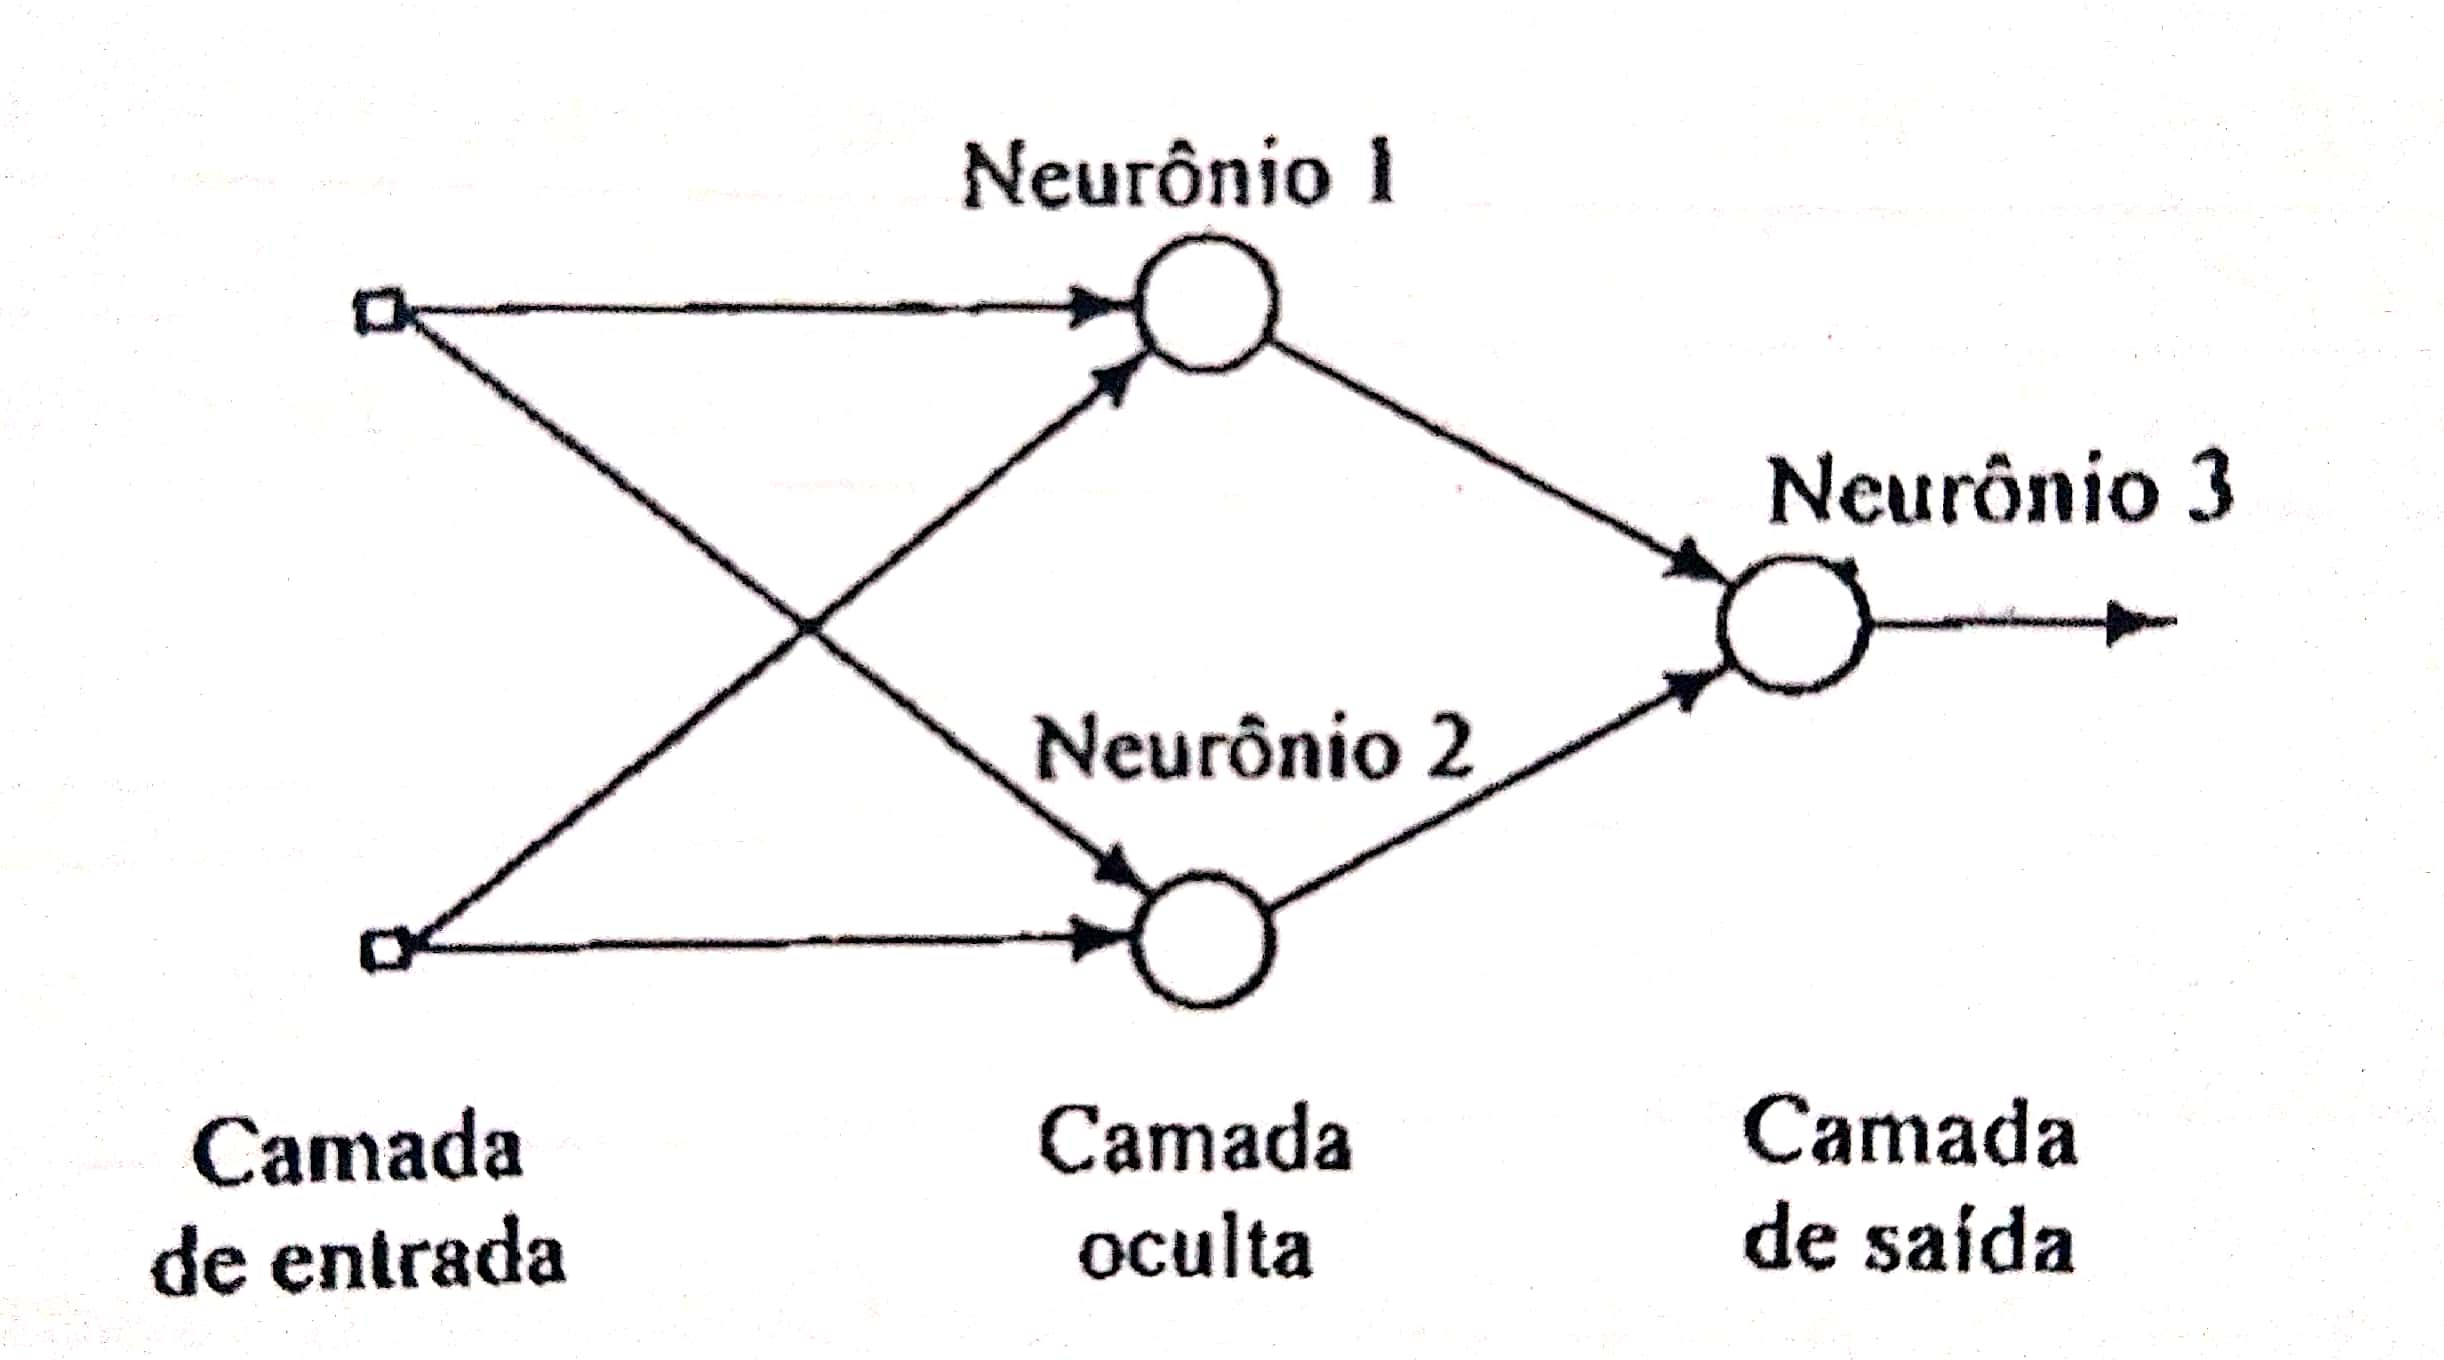
</div>

Sabemos que a função lógica elementar "OU exclusivo" apresenta o padrão de entrada (0,0), (0,1), (1,1), (1,0), correspondente aos quatro vértices do quadrado unitário. As classes as quais esses padrões de entrada pertencem variam entre os valores 0 ou 1. Para esclarecer o problema, observe a seguinte tabela:

In [5]:
# Leitura e plotagem da tabela correspondente à função lógica "OU exclusivo".
problema_xor = pd.read_csv('xor.csv')
problema_xor.head()

,x1,x2,d
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


Além dos valores do espaço de entrada e de saída, sabemos, também, que a função lógica "OU exclusivo" não é linearmente separável, e, portanto, precisamos de uma rede neural com ao menos uma camada escondida, conforme representado na figura dada pelo exercício. Assim, para iniciar o exercício, devemos, primeiramente, criar os pesos iniciais para a rede 2-2-1 do enunciado e treinar o programa anteriormente criado com esses dados. Observe abaixo a aplicação das funções:

In [6]:
# Dados do problema "OU exclusivo":
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])    # Espaço de entrada do problema do "OU exclusivo"
output_esperado = np.array([[0],[1],[1],[0]])    # Resultados esperados para o problema do "OU exclusivo"

# Chamando a função "cria_network":
network = cria_network(2, 2, 1)    # Ou seja, 2 entradas (no caso, x1 e x2), 2 camadas ocultas e 1 saída.

# Chamando a função "treina_network":
lista_epochs, lista_erro, lista_pesos_hidden, lista_bias_hidden, lista_pesos_output, lista_bias_output = treina_network(network, inputs, output_esperado, 0.5, 600)

Agora que introduzirmos devidamente o problema do "OU exclusivo", vamos à resolução:

### Resolução: a)

Para avaliar a performance da rede neural construída, calcularemos o erro quadrático médio (MSE) de saída em cada iteração (epoch). Para isso, precisaremos, primeiramente, consertar a dimensão da lista de erros obtida. Acompanhe abaixo:

In [7]:
# Consertando a dimensão da lista de erros:
lista_erro = np.squeeze(lista_erro)

# Calculando o MSE dos erros de cada epoch:
lista_mse = []
for list in lista_erro:
    lista_mse.append((np.mean(np.square(list)))/2)

Agora, vamos observar a variação do erro quadrático médio de saída:

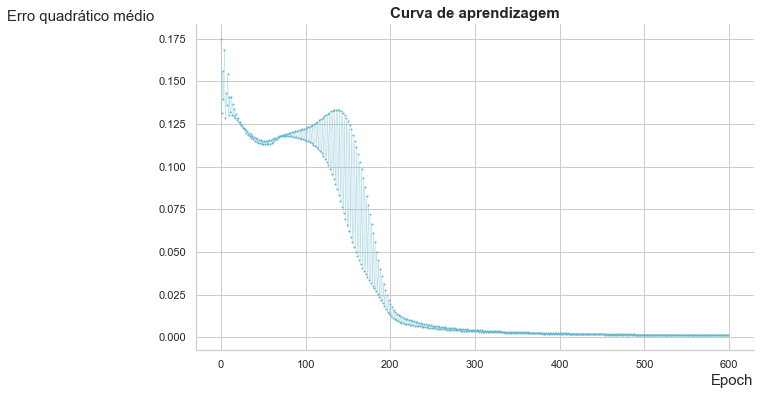

In [8]:
plt.figure(figsize = (10, 6))
plt.title('Curva de aprendizagem', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, loc='right')
plt.ylabel('Erro quadrático médio', rotation=0, fontsize=15, loc='top')
plt.plot(lista_epochs, lista_mse, linewidth=0.2, marker='o', markersize=1, color='c')

Como dito anteriormente, o cálculo do MSE é importante para avaliar a performance da rede, visto que a observação da evolução da curva de aprendizagem é o melhor modo de monitorar se os pesos e o bias estão atingindo seus valores ideais. Assim, a aproximação do erro quadrático médio de seu mínimo indica uma melhora na convergência do processo de adaptação da rede neural.

### Resolução: b)

Iremos, agora, plotar a variação de cada peso em função das iterações (epochs). Começaremos pelos neurônios ocultos, equivalentes aos neurônios 1 e 2 observados na figura dada pelo enunciado.

Antes da montagem dos gráficos, porém, é necessário consertar as dimensões das listas de peso e bias, além de separar devidamente os seus valores para cada neurônio correspondente. Observe:

In [9]:
# Consertando as dimensões das listas relativas aos neurônios 1 e 2 (ocultos):
lista_pesos_hidden = np.squeeze(lista_pesos_hidden)
lista_bias_hidden = np.squeeze(lista_bias_hidden)

# Separando a lista_pesos_hidden em peso 1 e peso 2 do neurônio 1 + peso 1 e peso 2 do neurônio 2 (ambos ocultos):
lista_w1_hidden1 = []
lista_w2_hidden1 = []
lista_w1_hidden2 = []
lista_w2_hidden2 = []
for conjunto in lista_pesos_hidden:
    for list in conjunto:
        for element in list:
            if element == conjunto[0][0]:
                lista_w1_hidden1.append(element)
            elif element == conjunto[0][1]:
                lista_w2_hidden1.append(element)
            elif element == conjunto[1][0]:
                lista_w1_hidden2.append(element)
            else:
                lista_w2_hidden2.append(element) 
                
# Separando a lista_bias_hidden em bias do neurônio 1 e bias do neurônio 2 (ambos ocultos):
lista_b_hidden1 = []
lista_b_hidden2 = []
for list in lista_bias_hidden:
    for element in list:
        if element == list[0]:
            lista_b_hidden1.append(element)
        else:
            lista_b_hidden2.append(element)   

Agora, sim, plotaremos o gráfico do neurônio 1:

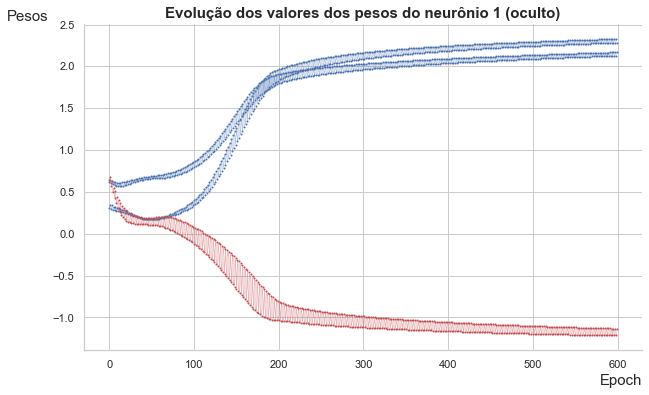

In [10]:
plt.figure(figsize = (10, 6))
plt.title('Evolução dos valores dos pesos do neurônio 1 (oculto)', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, loc='right')
plt.ylabel('Pesos', rotation=0, fontsize=15, loc='top')
w1 = plt.plot(lista_epochs, lista_w1_hidden1, linewidth=0.2, marker='o', markersize=1, color='b')
w2 = plt.plot(lista_epochs, lista_w2_hidden1, linewidth=0.2, marker='o', markersize=1, color='b')
b = plt.plot(lista_epochs, lista_b_hidden1, linewidth=0.2, marker='o', markersize=1, color='r')

É interessante ver como a evolução dos pesos começa a estabilizar no final do gráfico acima, indicando que eles encontram-se próximo de seus valores ideais. Comentaremos mais sobre esses valores no item c).

E, também, o gráfico do neurônio 2:

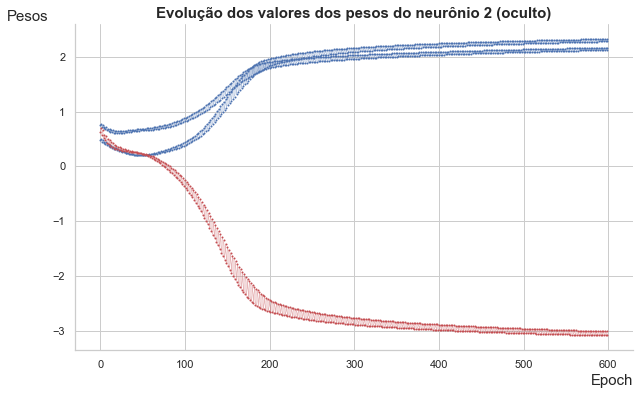

In [11]:
plt.figure(figsize = (10, 6))
plt.title('Evolução dos valores dos pesos do neurônio 2 (oculto)', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, loc='right')
plt.ylabel('Pesos', rotation=0, fontsize=15, loc='top')
w1 = plt.plot(lista_epochs, lista_w1_hidden2, linewidth=0.2, marker='o', markersize=1, color='b')
w2 = plt.plot(lista_epochs, lista_w2_hidden2, linewidth=0.2, marker='o', markersize=1, color='b')
b = plt.plot(lista_epochs, lista_b_hidden2, linewidth=0.2, marker='o', markersize=1, color='r')

Novamente, nota-se que a evolução dos pesos estabiliza nas iterações finais, indicando que estes encontram-se próximo de seus valores ótimos. Comentaremos mais sobre esses valores no item c).

Finalmente, vamos ao neurônio de saída, equivalente ao neurônio 3 observados na figura dada pelo enunciado. Mais uma vez, é necessário consertar as dimensões das listas de peso e bias, além de separar devidamente os seus valores. Veja:

In [12]:
# Consertando as dimensões das listas relativas ao neurônio 3 (saída):
lista_bias_output = np.squeeze(lista_bias_output)
lista_pesos_output = np.squeeze(lista_pesos_output)

# Separando a lista_pesos_output em peso 1 e peso 2:
lista_w1_output = []
lista_w2_output = []
for list in lista_pesos_output:
    for element in list:
        if element == list[0]:
            lista_w1_output.append(element)
        else:
            lista_w2_output.append(element)     

Por último, o gráfico do neurônio 3 pode ser observado abaixo:

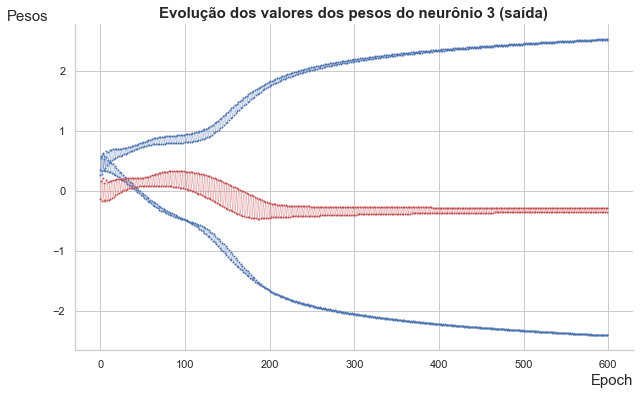

In [13]:
plt.figure(figsize = (10, 6))
plt.title('Evolução dos valores dos pesos do neurônio 3 (saída)', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, loc='right')
plt.ylabel('Pesos', rotation=0, fontsize=15, loc='top')
w1 = plt.plot(lista_epochs, lista_w1_output, linewidth=0.2, marker='o', markersize=1, color='b')
w2 = plt.plot(lista_epochs, lista_w2_output, linewidth=0.2, marker='o', markersize=1, color='b')
b = plt.plot(lista_epochs, lista_bias_output, linewidth=0.2, marker='o', markersize=1, color='r')

No neurônio de saída, a situação não é diferente: os pesos estabilizam no final das curvas. Comentaremos mais sobre esses valores no item c).

### Resolução: c)

Levando em conta que a representação dos valores dos pesos de todos os 3 neurônios parecem ter estabilizado no final, temos que seus últimos valores encontrados podem também ser considerados como ótimos. Vejamos abaixo quais são esses valores:

In [14]:
print('O valor ótimo de w1 encontrado para o neurônio 1 (oculto) é:', lista_w1_hidden1[-1])
print('O valor ótimo de w2 encontrado para o neurônio 1 (oculto) é:', lista_w2_hidden1[-1])
print('O valor ótimo de b encontrado para o neurônio 1 (oculto) é:', lista_b_hidden1[-1])

print('\nO valor ótimo de w1 encontrado para o neurônio 2 (oculto) é:', lista_w1_hidden2[-1])
print('O valor ótimo de w2 encontrado para o neurônio 2 (oculto) é:', lista_w2_hidden2[-1])
print('O valor ótimo de b encontrado para o neurônio 2 (oculto) é:', lista_b_hidden2[-1])

print('\nO valor ótimo de w1 encontrado para o neurônio 3 (saída) é:', lista_w1_output[-1])
print('O valor ótimo de w2 encontrado para o neurônio 3 (saída) é:', lista_w2_output[-1])
print('O valor ótimo de b encontrado para o neurônio 3 (saída) é:', lista_bias_output[-1])

O valor ótimo de w1 encontrado para o neurônio 1 (oculto) é: 2.1689968652318647
O valor ótimo de w2 encontrado para o neurônio 1 (oculto) é: 2.2853682025011564
O valor ótimo de b encontrado para o neurônio 1 (oculto) é: -1.1335284794511882

O valor ótimo de w1 encontrado para o neurônio 2 (oculto) é: 2.1694517601362384
O valor ótimo de w2 encontrado para o neurônio 2 (oculto) é: 2.285708175193426
O valor ótimo de b encontrado para o neurônio 2 (oculto) é: -3.090497762405902

O valor ótimo de w1 encontrado para o neurônio 3 (saída) é: 2.5262468685347876
O valor ótimo de w2 encontrado para o neurônio 3 (saída) é: -2.4010852792594175
O valor ótimo de b encontrado para o neurônio 3 (saída) é: -0.2767906668167562
